In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Para realizar test de hipótesis
from scipy.stats import ttest_ind
from scipy.stats import norm
import scipy.stats as scs
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway
from scipy.stats import pearsonr

In [32]:
#Limpieza y exploracion inicial de los datos
#Cargar archivo para explorar los datos
listings2 = pd.read_csv(r'C:\Users\annie\OneDrive\Escritorio\Bootcamp Analisis de Datos\Visual\Módulo 2\Proyecto_M2\listings.csv')
# Display las primeras 5 filas del dataset para entender la estructura de los datos
listings2.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,25436,In the forest Sea view Two minutes to the city.,105823,Yesim,NaN,Besiktas,41.078830,29.038630,Entire home/apt,NaN,7,0,NaN,NaN,1,0,0,NaN
1,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.091040,29.055800,Entire home/apt,4108.0,3,0,NaN,NaN,1,88,0,NaN
2,607344,Blue Suites by V 2 Sultanahmet,2751565,Volkan,NaN,Fatih,41.005190,28.979070,Entire home/apt,3522.0,2,61,2024-06-25,0.44,3,329,5,Exempt
3,34177,PETIT HOUSE,147330,Ercan,NaN,Besiktas,41.066810,29.040350,Entire home/apt,1315.0,10,16,2024-01-03,0.15,2,185,2,NaN
4,610010,nicely decorated central flat at Nişantaşı,3017457,Zeynep,NaN,Sisli,41.054108,28.992821,Entire home/apt,NaN,1,0,NaN,NaN,1,362,0,NaN


Estadísticas descriptivas

In [33]:
#Determinar el rango de precios en el dataset
#Valores maximos y minimos de la columna price
print("Precio máximo:", listings2['price'].max())
print("Precio mínimo:", listings2['price'].min())


Precio máximo: 3310226.0
Precio mínimo: 80.0


<p style="color: red ;">SEGUIR REVISANDO! .</p>

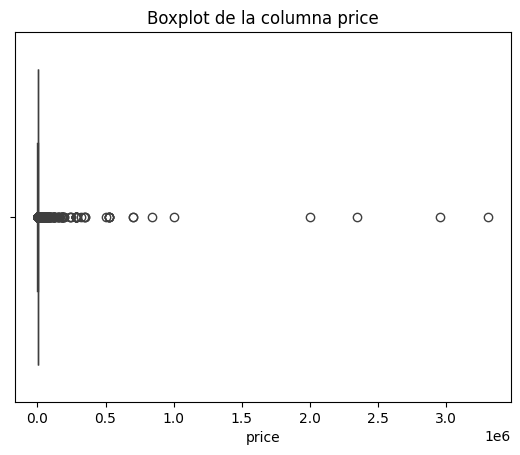

{'price': {'num_outliers': 2479,
  'lower_bound': -3852.75,
  'upper_bound': 25969.25}}

In [34]:
# Función para calcular outliers usando el rango intercuartílico (IQR)
def outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return serie[(serie > upper_bound) | (serie < lower_bound)]

# demostrar graficamente los outliers de la columna price
sns.boxplot(x=listings2['price'])
plt.title('Boxplot de la columna price')
plt.show()

# Detectar outliers y visualizar
outliers_info = {}
for column in ['price']:
    outliers = outliers_iqr(listings2[column])
    outliers_info[column] = {
        "num_outliers": len(outliers),
        "lower_bound": outliers_iqr(listings2[column]).quantile(0.25) - 1.5 * (outliers_iqr(listings2[column]).quantile(0.75) - outliers_iqr(listings2[column]).quantile(0.25)),
        "upper_bound": outliers_iqr(listings2[column]).quantile(0.75) + 1.5 * (outliers_iqr(listings2[column]).quantile(0.75) - outliers_iqr(listings2[column]).quantile(0.25)),
    }

outliers_info


In [35]:
#Noches mínimas y máximas
#Valores maximos y minimos de la columna minimum_nights
print("Noches mínimas:", listings2['minimum_nights'].min())
print("Mediana de noches minimas:", listings2['minimum_nights'].median())
print("Noches máximas:", listings2['minimum_nights'].max())
print("Noches promedio:", listings2['minimum_nights'].mean())


Noches mínimas: 1
Mediana de noches minimas: 2.0
Noches máximas: 999
Noches promedio: 16.353202342716795


In [36]:
#Disponibilidad 
#Valores maximos y minimos de la columna availability_365
print("Disponibilidad mínima:", listings2['availability_365'].min())
print("Disponibilidad máxima:", listings2['availability_365'].max())
print("Disponibilidad promedio:", listings2['availability_365'].mean())
# Determinar si la mayoría de las propiedades están disponibles gran parte del año
# Consideramos que una propiedad está disponible gran parte del año si su disponibilidad es mayor a 180 días
disponibilidad_gran_parte_del_ano = listings2['availability_365'] > 180
porcentaje_disponibles_gran_parte_del_ano = disponibilidad_gran_parte_del_ano.mean() * 100

print(f"Porcentaje de propiedades disponibles gran parte del año: {porcentaje_disponibles_gran_parte_del_ano:.2f}%")


Disponibilidad mínima: 0
Disponibilidad máxima: 365
Disponibilidad promedio: 253.0603312551168
Porcentaje de propiedades disponibles gran parte del año: 71.22%


In [37]:
#Determinar cantidad de reseñas historicas por propiedad
#Valores maximos y minimos de la columna number_of_reviews
print("Reseñas mínimas:", listings2['number_of_reviews'].min())
print("Reseñas máximas:", listings2['number_of_reviews'].max())
print("Reseñas promedio:", listings2['number_of_reviews'].mean())


Reseñas mínimas: 0
Reseñas máximas: 1375
Reseñas promedio: 15.110208451413817


In [38]:
#Eliminar columnas irrelevantes ('neighbourhood_group','last_review','reviews_per_month','number_of_reviews_ltm'))
#Primero debo definir las columnas que se quieren eliminar 
columns_to_drop = ['neighbourhood_group','last_review','reviews_per_month','number_of_reviews_ltm']
#Eliminar columnas
listings2 = listings2.drop(columns=columns_to_drop)

In [39]:
#Limpiar datos eliminando o ajustando valores atipicos
# Análisis inicial: Revisar valores faltantes y estadísticas básicas
missing_values = listings2.isnull().sum()
basic_stats = listings2.describe()

# Crear un resumen visual de los valores faltantes
missing_values_percentage = (missing_values / len(listings2)) * 100
missing_values_summary = pd.DataFrame({
    "Column": missing_values.index,
    "Missing Values": missing_values.values,
    "Percentage": missing_values_percentage.values
})

# Mostrar estadísticas básicas y resumen de valores faltantes al usuario
# Mostrar resumen de valores faltantes al usuario
print("Resumen de Valores Faltantes en los Datos")
print(missing_values_summary)

# Mostrar las estadísticas básicas de los datos
basic_stats



Resumen de Valores Faltantes en los Datos
                            Column  Missing Values  Percentage
0                               id               0    0.000000
1                             name               0    0.000000
2                          host_id               0    0.000000
3                        host_name               0    0.000000
4                    neighbourhood               0    0.000000
5                         latitude               0    0.000000
6                        longitude               0    0.000000
7                        room_type               0    0.000000
8                            price            2526    7.953901
9                   minimum_nights               0    0.000000
10               number_of_reviews               0    0.000000
11  calculated_host_listings_count               0    0.000000
12                availability_365               0    0.000000
13                         license           21420   67.447572


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3.175800e+04,3.175800e+04,31758.000000,31758.000000,2.923200e+04,31758.000000,31758.000000,31758.000000,31758.000000
mean,6.782507e+17,3.251191e+08,41.029089,28.971249,3.947348e+03,16.353202,15.110208,17.791234,253.060331
std,4.172040e+17,1.878661e+08,0.049189,0.153872,3.513645e+04,58.297329,36.302048,57.763157,113.245970
min,2.543600e+04,8.592300e+04,40.814802,28.007570,8.000000e+01,1.000000,0.000000,1.000000,0.000000
25%,5.438425e+17,1.484018e+08,41.004620,28.963284,1.258000e+03,1.000000,0.000000,1.000000,177.000000
50%,8.244363e+17,3.875003e+08,41.031240,28.981290,2.000000e+03,2.000000,2.000000,4.000000,270.000000
75%,9.917672e+17,4.855514e+08,41.050500,29.009578,3.286000e+03,4.000000,13.000000,11.000000,363.000000
max,1.189249e+18,5.862283e+08,41.486680,29.908050,3.310226e+06,999.000000,1375.000000,445.000000,365.000000


In [40]:
# Establecer los límites para identificar valores extremos
lower_limit = listings2['price'].quantile(0.01)
upper_limit = listings2['price'].quantile(0.99)

# Crear dos subconjuntos: datos extremos y no extremos
extreme_prices_data = listings2[(listings2['price'] < lower_limit) | (listings2['price'] > upper_limit)]
non_extreme_prices_data = listings2[(listings2['price'] >= lower_limit) & (listings2['price'] <= upper_limit)]

# Calcular estadísticas para valores extremos
extreme_stats = extreme_prices_data['price'].describe()

# Mostrar al usuario estadísticas de precios extremos y los datos como segmento aparte
from IPython.display import display

# Mostrar al usuario estadísticas de precios extremos y los datos como segmento aparte
display(extreme_stats.to_frame().rename(columns={'price': 'Estadísticas de Precios Extremos'}))
display(extreme_prices_data.rename(columns={'price': 'Listado de Propiedades con Precios Extremos'}))


,Estadísticas de Precios Extremos
count,5.670000e+02
mean,6.288680e+04
std,2.446455e+05
min,8.000000e+01
25%,3.000000e+02
50%,2.300500e+04
75%,3.886800e+04
max,3.310226e+06


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,Listado de Propiedades con Precios Extremos,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,license
298,2375944,1001 Gece Organizasyon Evi,12139414,Perya,Uskudar,41.043340,29.055880,Entire home/apt,30000.0,1,47,2,118,NaN
304,1570898,"Room in large Sea View Apt, Taksim",8353043,Khaled,Beyoglu,41.028240,28.983490,Private room,24651.0,2,75,1,365,NaN
699,5393121,tramway6 flats #4,27051459,Uğur,Beyoglu,41.035090,28.975640,Entire home/apt,65729.0,1,78,1,361,NaN
703,5433084,Luxurious Villa for Large Families,28181401,Fevziye,Beykoz,41.119080,29.146300,Entire home/apt,65000.0,7,8,1,358,NaN
920,7352957,İstanbul Tarabya da emsalsiz villa,38529218,Tayfun,Sariyer,41.140870,29.039410,Entire home/apt,3310226.0,15,14,1,90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31104,1178755120275990612,Betelguese / Superior 2+1 Room with Jacuzzi,583214894,Mola,Silivri,41.114232,28.366892,Entire home/apt,56000.0,1,0,4,365,Exempt
31105,1178759778116054745,Rigel / Premium 3+1 Room with Jacuzzi,583214894,Mola,Silivri,41.115479,28.368698,Entire home/apt,60000.0,1,0,4,365,Exempt
31176,1179099896387706704,4-Bedrooms Apartment in İstanbul Pera,367285472,Anılcan,Beyoglu,41.030499,28.971763,Entire home/apt,32865.0,3,0,3,358,Exempt
31307,1182446450794149090,Istanbul dublex house,472394358,Ali,Fatih,41.002853,28.978535,Entire home/apt,34863.0,3,0,4,358,T1-015213


In [41]:
#Determinar vecindarios de mayor precio promedio
# Calcular el precio promedio por vecindario y tipo de propiedad
average_price_by_neighbourhood = listings2.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

print('Vecindarios con mayor precio promedio:', average_price_by_neighbourhood.head(5))

Vecindarios con mayor precio promedio: neighbourhood
Sariyer         17306.031034
Silivri          9713.138614
Pendik           9638.198502
Besiktas         7950.073268
Buyukcekmece     7696.845000
Name: price, dtype: float64


In [42]:
# Eliminar valores atípicos en la columna 'price'
# Considerar valores razonables entre el percentil 1 y el percentil 99
lower_limit = listings2['price'].quantile(0.01)
upper_limit = listings2['price'].quantile(0.99)

# Filtrar los datos en este rango
filtered_data = listings2[(listings2['price'] >= lower_limit) & (listings2['price'] <= upper_limit)]

# Resumen después de la limpieza de precios
cleaned_stats = filtered_data['price'].describe()

# Mostrar los resultados al usuario
print("Estadísticas de Precios Limpiados")
print(cleaned_stats)


Estadísticas de Precios Limpiados
count    28665.000000
mean      2781.512751
std       2662.360432
min        330.000000
25%       1279.000000
50%       2000.000000
75%       3250.000000
max      22538.000000
Name: price, dtype: float64


In [43]:
from IPython.display import display

# Agrupar por vecindario y calcular el precio promedio
location_price = filtered_data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).reset_index()
location_price.rename(columns={'price': 'average_price'}, inplace=True)

# Mostrar el resumen al usuario
display(location_price)


,neighbourhood,average_price
0,Silivri,5909.244444
1,Sile,5774.415584
2,Catalca,4533.710526
3,Adalar,4503.343750
4,Buyukcekmece,4392.413978
5,Beykoz,4111.570513
6,Sariyer,4057.892086
7,Basaksehir,3614.365439
8,Sisli,3294.426157
9,Beylikduzu,3265.344961


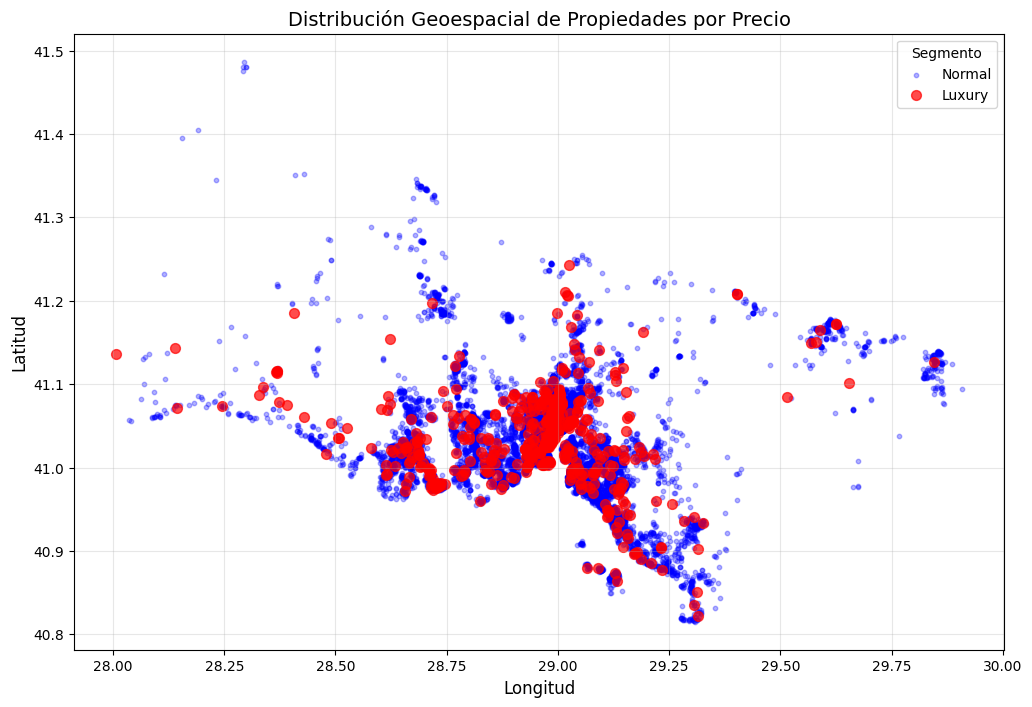

In [44]:

# Crear un gráfico de dispersión geoespacial para comparar propiedades extremas y no extremas
plt.figure(figsize=(12, 8))

# Propiedades con valores no extremos
plt.scatter(
    non_extreme_prices_data['longitude'],
    non_extreme_prices_data['latitude'],
    alpha=0.3,
    s=10,
    label='Normal',
    color='blue'
)

# Propiedades con valores extremos
plt.scatter(
    extreme_prices_data['longitude'],
    extreme_prices_data['latitude'],
    alpha=0.7,
    s=50,
    label='Luxury',
    color='red'
)

# Configuración del gráfico
plt.title("Distribución Geoespacial de Propiedades por Precio", fontsize=14)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)
plt.legend(title="Segmento", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


Propiedades extremas:
Se concentran en áreas específicas, como Beykoz, Sariyer, y Uskudar, que suelen ser vecindarios exclusivos y lujosos.
Estas ubicaciones probablemente ofrecen características únicas como vistas al mar o proximidad a áreas residenciales premium.


Propiedades no extremas: Están distribuidas de manera más uniforme por toda la ciudad, incluyendo áreas céntricas y vecindarios turísticos.

*** la ubicación juega un papel crucial en los precios extremos, orientados a un segmento de lujo

In [45]:
#Calcular rendimiento anual promedio
# Calcular el rendimiento anual promedio por vecindario
annual_yield = filtered_data.groupby('neighbourhood')['price'].mean() * filtered_data.groupby('neighbourhood')['availability_365'].mean()
annual_yield = annual_yield.sort_values(ascending=False).reset_index()
annual_yield.rename(columns={0: 'annual_yield'}, inplace=True)

# Mostrar el rendimiento anual promedio por vecindario
display(annual_yield.head(5))




,neighbourhood,annual_yield
0,Silivri,1.527934e+06
1,Sile,1.290859e+06
2,Catalca,1.197258e+06
3,Buyukcekmece,1.193556e+06
4,Sariyer,1.087807e+06


In [46]:
#convertir archivo a csv
listings2.to_csv(r'C:\Users\annie\OneDrive\Escritorio\Bootcamp Analisis de Datos\Visual\Módulo 2\Proyecto_M2\listings2_1.csv', index=False)


In [47]:
# Suposiciones
occupancy_rate = 0.6  # 60% tasa de ocupación

# Calcular el ingreso anual estimado
listings2['estimated_annual_income'] = (
    listings2['price'] * 
    listings2['availability_365'] * 
    occupancy_rate
)

# Agrupar por vecindario y calcular el ingreso anual promedio
neighborhood_income = listings2.groupby('neighbourhood')['estimated_annual_income'].mean().sort_values(ascending=False).reset_index()
neighborhood_income.rename(columns={'estimated_annual_income': 'average_annual_income'}, inplace=True)

# Identificar vecindarios con mayores y menores ingresos
top_neighborhoods = neighborhood_income.head(5)  # Top 5 con mayores ingresos
bottom_neighborhoods = neighborhood_income.tail(5)  # Bottom 5 con menores ingresos


# Mostrar los resultados al usuario
print("Vecindarios con Mayores Ingresos Anuales Promedio")
display(top_neighborhoods)
print("\nVecindarios con Menores Ingresos Anuales Promedio")
display(bottom_neighborhoods)


Vecindarios con Mayores Ingresos Anuales Promedio


,neighbourhood,average_annual_income
0,Silivri,1.727465e+06
1,Sariyer,1.635322e+06
2,Besiktas,1.532230e+06
3,Bagcilar,1.386070e+06
4,Buyukcekmece,1.328712e+06



Vecindarios con Menores Ingresos Anuales Promedio


,neighbourhood,average_annual_income
34,Sultangazi,310646.488889
35,Avcilar,274477.636634
36,Gungoren,267385.824324
37,Esenler,257587.622727
38,Sultanbeyli,211455.054545


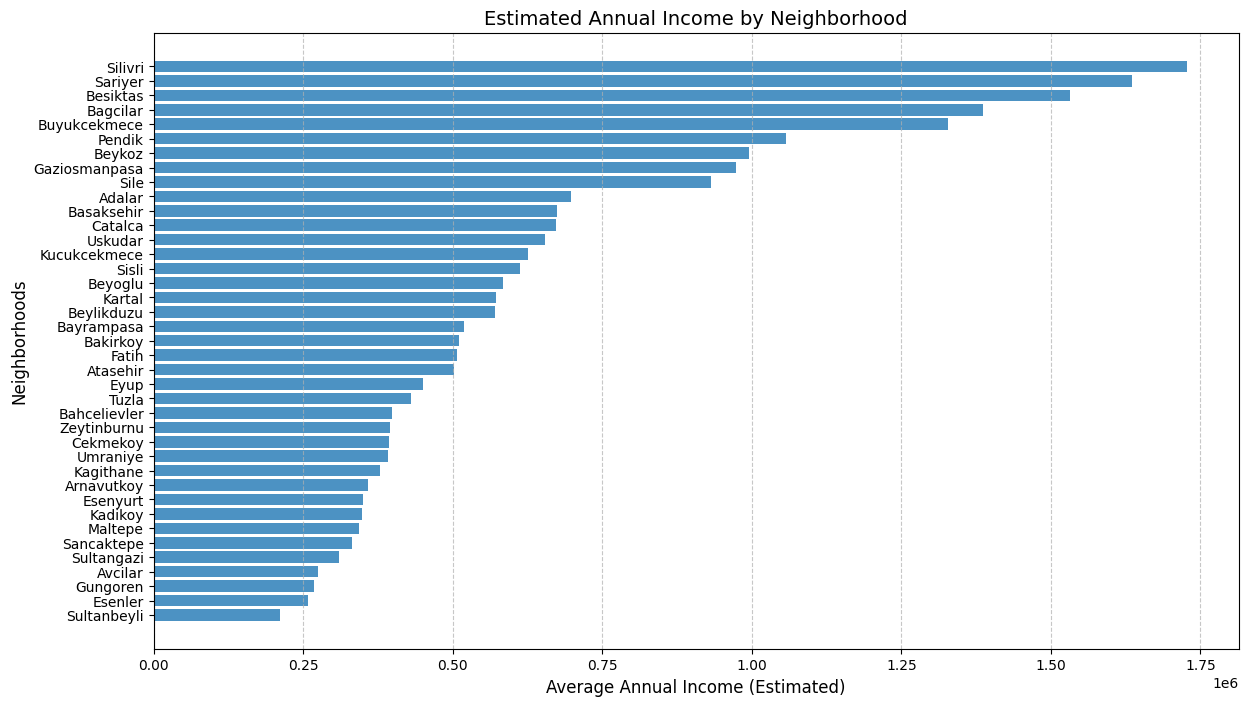

In [48]:
import matplotlib.pyplot as plt

# Ordenar vecindarios por ingresos promedio para tendencias visuales
neighborhood_income_sorted = neighborhood_income.sort_values(by='average_annual_income', ascending=False)

# Crear gráfico de barras para comparar ingresos anuales en todos los vecindarios
plt.figure(figsize=(14, 8))
plt.barh(neighborhood_income_sorted['neighbourhood'], neighborhood_income_sorted['average_annual_income'], alpha=0.8)
plt.xlabel('Average Annual Income (Estimated)', fontsize=12)
plt.ylabel('Neighborhoods', fontsize=12)
plt.title('Estimated Annual Income by Neighborhood', fontsize=14)
plt.gca().invert_yaxis()  # Invertir eje para que el top esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Razones detrás de los ingresos bajos en ciertos vecindarios

In [49]:
# Filtrar los vecindarios con los menores ingresos
low_income_neighborhoods = neighborhood_income_sorted.tail(5)
low_income_names = low_income_neighborhoods['neighbourhood']

# Filtrar datos de las propiedades en estos vecindarios
low_income_data = listings2[listings2['neighbourhood'].isin(low_income_names)]

# Calcular métricas clave: precio promedio, disponibilidad promedio, tipo de propiedad predominante
low_income_analysis = low_income_data.groupby('neighbourhood').agg({
    'price': 'mean',
    'availability_365': 'mean',
    'room_type': lambda x: x.mode()[0]  # Tipo de habitación predominante
}).reset_index()

low_income_analysis.rename(columns={
    'price': 'average_price',
    'availability_365': 'average_availability',
    'room_type': 'predominant_room_type'
}, inplace=True)

# Mostrar el análisis al usuario
from IPython.display import display

# Mostrar el análisis al usuario
display(low_income_analysis)


,neighbourhood,average_price,average_availability,predominant_room_type
0,Avcilar,1705.292079,244.414254,Entire home/apt
1,Esenler,1488.727273,166.472222,Private room
2,Gungoren,1805.972973,218.000000,Entire home/apt
3,Sultanbeyli,1161.454545,276.217391,Entire home/apt
4,Sultangazi,2007.777778,237.607143,Entire home/apt


Sultanbeyli tienen precios promedio significativamente más bajos (1,161) en comparación con otros vecindarios.

Esenler tiene la menor disponibilidad promedio anual (166 días), lo que limita las oportunidades de generar ingresos.

Las habitaciones privadas, típicamente genera menos ingresos en comparación con propiedades completas.

Estos vecindarios pueden carecer de atractivos turísticos o infraestructura adecuada, disminuyendo la demanda de los huéspedes.

In [50]:
#convertir archivo a csv
listings2.to_csv(r'C:\Users\annie\OneDrive\Escritorio\Bootcamp Analisis de Datos\Visual\Módulo 2\Proyecto_M2\listings2_1.csv', index=False)

In [51]:
#Nueva columna para clasificar propiedades por lujosas o básicas dependiendo del precio
# Crear una nueva columna para clasificar las propiedades de lujo ((con el promedio de precio mas caro y las que no como normales))
# Crear una nueva columna para clasificar las propiedades de lujo
average_price_threshold = listings2['price'].mean()
listings2['property_type'] = listings2['price'].apply(lambda x: 'Luxury' if x > average_price_threshold else 'Normal')

print("Propiedades Clasificadas por Lujo:", listings2['property_type'].value_counts())
print("Precio promedio de las propiedades:", average_price_threshold)




Propiedades Clasificadas por Lujo: property_type
Normal    26293
Luxury     5465
Name: count, dtype: int64
Precio promedio de las propiedades: 3947.3480090311987


In [52]:
#Nueva columna con rangos de precios
# Crear una nueva columna para clasificar las propiedades por rango de precios
def price_range(price):
    if price < 100:
        return '0-100'
    elif price < 200:
        return '100-200'
    else:
        return '200+'

In [53]:
#Determinar columnas numericas y columnas categoricas
numeric_columns = listings2.select_dtypes(include=[np.number]).columns
categorical_columns = listings2.select_dtypes(include=[object]).columns


In [54]:
# Rellenar valors faltantes en columnas numericas con la media
listings2[numeric_columns] = listings2[numeric_columns].fillna(listings2[numeric_columns].mean())


In [55]:
#Rellenar valores faltantes en columnas categoricas con "Sin especificar"
listings2[categorical_columns] = listings2[categorical_columns].fillna('Sin especificar')


In [56]:

# Agrupar valores categóricos poco frecuentes en una sola categoría ("Otros")
def group_categories(data, column, threshold):
    value_counts = data[column].value_counts()
    to_group = value_counts[value_counts < threshold].index
    data[column] = data[column].apply(lambda x: 'Otros' if x in to_group else x)
    return data


In [57]:
# Verificar si hay filas duplicadas en el dataset
duplicates = listings2.duplicated().sum()
print("Número de filas duplicadas:", duplicates)


Número de filas duplicadas: 0


In [58]:
#Crear columnas para determinar la tasa de ocupación
# Crear una nueva columna para calcular la tasa de ocupación
# Usar una estimación basada en el número de reseñas y la disponibilidad
listings2['occupancy_rate'] = listings2['number_of_reviews'] / listings2['availability_365']



In [59]:
#Verificar si existen valores negativos en precios
# Verificar si hay valores negativos en la columna 'price'
negative_prices = listings2[listings2['price'] < 0]
print("Número de precios negativos:", len(negative_prices))


Número de precios negativos: 0


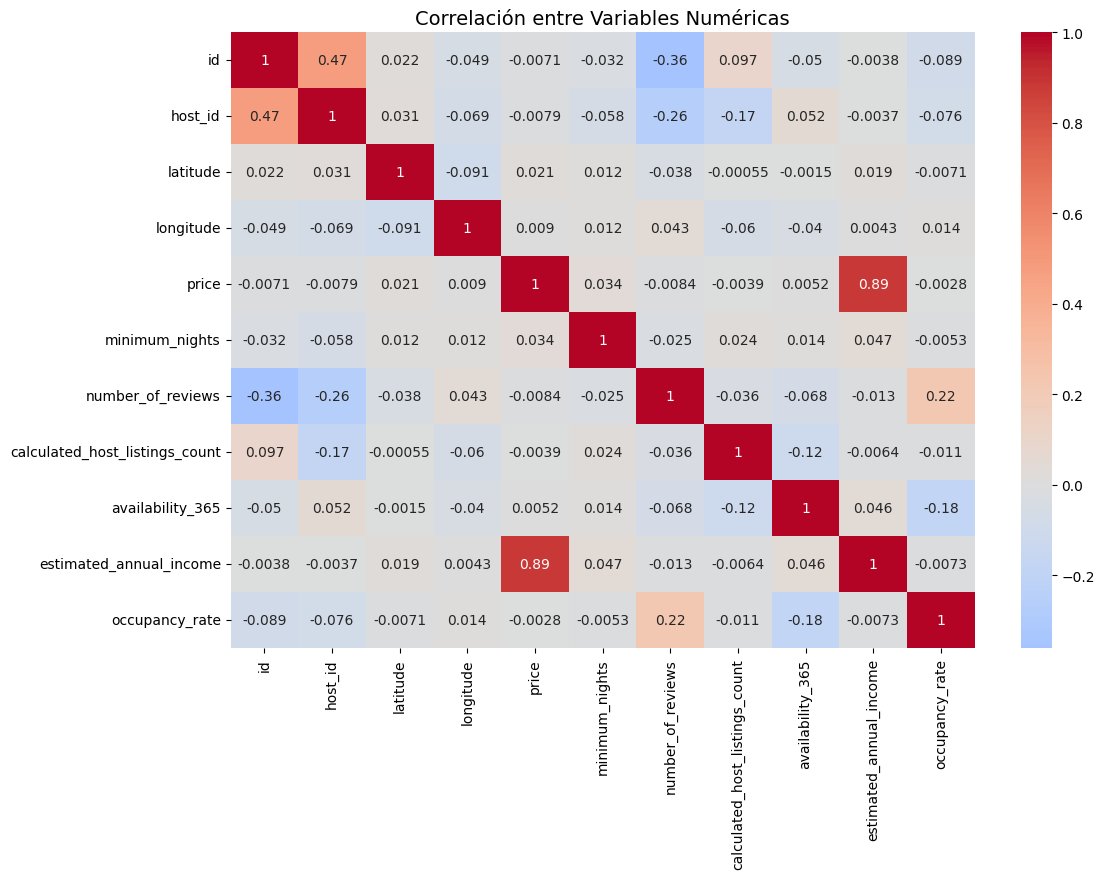

In [60]:
#Revision de relaciones entre variables
# Calcular la correlación entre las variables numéricas
numeric_listings2 = listings2.select_dtypes(include=[np.number])
correlation_matrix = numeric_listings2.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Variables Numéricas', fontsize=14)
plt.show()

